In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical, plot_model
from sklearn.model_selection import train_test_split, KFold
from keras_tuner import HyperModel, Hyperband
from tensorflow import keras
#import seaborn as sns


In [4]:
data_folder = os.path.join(os.getcwd(), 'TRY')
files = os.listdir(data_folder)

In [5]:
def find_matching_files(file_list, angle, position):
    for file in file_list:
        if f"angle_{angle}" in file and f"pos_{position}" in file:
            matching_file = os.path.join(data_folder, file)
    return matching_file

In [6]:
input_pos = input("Enter Position: ")
input_deg = input("Enter Angle: ")

In [7]:
scan_df = pd.read_csv(find_matching_files(files, input_deg, input_pos))

In [8]:
scan_df[scan_df['shape'] == 'cylinder']

,0.0,2.8125,5.625,8.4375,11.25,14.0625,16.875,19.6875,22.5,25.3125,...,334.6875,337.5,340.3125,343.125,345.9375,348.75,351.5625,354.375,357.1875,shape
0,0.0,-0.085163,-0.080841,-0.071943,-0.058190,-0.039880,-0.017911,0.006286,0.030891,0.053904,...,-0.047189,-0.055174,-0.060296,-0.063950,-0.067257,-0.070913,-0.075109,-0.079522,-0.083391,cylinder
1,0.0,-0.141593,-0.109362,-0.069142,-0.026906,0.011298,0.040283,0.056514,0.058634,0.047636,...,0.076036,0.068077,0.044287,0.007747,-0.036372,-0.081684,-0.121613,-0.150422,-0.164088,cylinder
2,0.0,-0.046826,-0.028027,-0.004448,0.019848,0.040675,0.054416,0.058615,0.052391,0.036598,...,0.043735,0.053491,0.051045,0.037748,0.016718,-0.007783,-0.031113,-0.049030,-0.058380,cylinder
3,0.0,0.360892,0.364566,0.331504,0.264984,0.172119,0.062986,-0.050617,-0.156628,-0.244179,...,-0.289406,-0.295177,-0.273276,-0.223037,-0.147256,-0.052128,0.053314,0.158190,0.251071,cylinder
4,0.0,-1.258410,-0.981396,-0.623304,-0.213705,0.212372,0.618299,0.969881,1.239068,1.406898,...,0.138474,-0.031347,-0.260478,-0.530125,-0.814279,-1.082522,-1.303528,-1.448828,-1.496375,cylinder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,cylinder
1965,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,cylinder
1966,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,cylinder
1967,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,cylinder


In [9]:
scan_data_df = scan_df

In [10]:
#scan_data_df.to_csv('scan_data.csv', index=False)

In [11]:
scan_data_df

,0.0,2.8125,5.625,8.4375,11.25,14.0625,16.875,19.6875,22.5,25.3125,...,334.6875,337.5,340.3125,343.125,345.9375,348.75,351.5625,354.375,357.1875,shape
0,0.0,-0.085163,-0.080841,-0.071943,-0.058190,-0.039880,-0.017911,0.006286,0.030891,0.053904,...,-0.047189,-0.055174,-0.060296,-0.063950,-0.067257,-0.070913,-0.075109,-0.079522,-0.083391,cylinder
1,0.0,-0.141593,-0.109362,-0.069142,-0.026906,0.011298,0.040283,0.056514,0.058634,0.047636,...,0.076036,0.068077,0.044287,0.007747,-0.036372,-0.081684,-0.121613,-0.150422,-0.164088,cylinder
2,0.0,-0.046826,-0.028027,-0.004448,0.019848,0.040675,0.054416,0.058615,0.052391,0.036598,...,0.043735,0.053491,0.051045,0.037748,0.016718,-0.007783,-0.031113,-0.049030,-0.058380,cylinder
3,0.0,0.360892,0.364566,0.331504,0.264984,0.172119,0.062986,-0.050617,-0.156628,-0.244179,...,-0.289406,-0.295177,-0.273276,-0.223037,-0.147256,-0.052128,0.053314,0.158190,0.251071,cylinder
4,0.0,-1.258410,-0.981396,-0.623304,-0.213705,0.212372,0.618299,0.969881,1.239068,1.406898,...,0.138474,-0.031347,-0.260478,-0.530125,-0.814279,-1.082522,-1.303528,-1.448828,-1.496375,cylinder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2501,0.0,-11.740891,-10.805783,-9.329654,-7.384496,-5.078376,-2.547999,0.052493,2.565278,4.843557,...,2.171001,0.002022,-2.216186,-4.407102,-6.487312,-8.367295,-9.954289,-11.157423,-11.894857,cube
2502,0.0,-11.731843,-10.289179,-8.327385,-5.979110,-3.403109,-0.769479,1.756350,4.028951,5.935661,...,2.368173,-0.028686,-2.538075,-5.037732,-7.392091,-9.461188,-11.111592,-12.228334,-12.726446,cube
2503,0.0,-10.257327,-8.183989,-5.678353,-2.923324,-0.119746,2.534689,4.866214,6.742694,8.085863,...,-0.179161,-2.479931,-4.835221,-7.119582,-9.189376,-10.895122,-12.096819,-12.680298,-12.572301,cube
2504,0.0,-8.484758,-6.258293,-3.712074,-1.017632,1.642732,4.094817,6.190508,7.822418,8.933199,...,-3.104303,-5.082207,-7.002880,-8.767087,-10.261547,-11.369670,-11.984974,-12.025306,-11.445718,cube


In [12]:
scan_data_df.groupby('shape').size()

shape
cube        928
cylinder    789
pentagon    789
dtype: int64

In [13]:
X = scan_data_df.drop('shape', axis = 1)
y = scan_data_df['shape']

In [14]:
y

0       cylinder
1       cylinder
2       cylinder
3       cylinder
4       cylinder
          ...   
2501        cube
2502        cube
2503        cube
2504        cube
2505        cube
Name: shape, Length: 2506, dtype: object

In [15]:
y_encoded = pd.get_dummies(y)

In [16]:
y_encoded

,cube,cylinder,pentagon
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
...,...,...,...
2501,True,False,False
2502,True,False,False
2503,True,False,False
2504,True,False,False


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.5, shuffle=True)


def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=4, max_value=15, step=1),
                    input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(y_encoded.shape[1], activation='softmax'))
    
    optimizer = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop'])
    
    if optimizer == 'adam':
        model.compile(optimizer=keras.optimizers.Adam(
            hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
            loss='categorical_crossentropy',
            metrics=['accuracy'])
    elif optimizer == 'sgd':
        model.compile(optimizer=keras.optimizers.SGD(
            hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
            loss='categorical_crossentropy',
            metrics=['accuracy'])
    elif optimizer == 'rmsprop':
        model.compile(optimizer=keras.optimizers.RMSprop(
            hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
            loss='categorical_crossentropy',
            metrics=['accuracy'])
    
    return model


In [18]:
tuner = Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='hyperband_2',
    project_name='hyperparameter_tuning_object_recognition'
)

In [19]:
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [20]:
tuner.search(X_train, y_train, 
             epochs=10, 
             validation_data=(X_test, y_test), 
             callbacks=[stop_early])


Trial 30 Complete [00h 00m 01s]
val_accuracy: 0.9952114820480347

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 00m 12s


In [21]:
# Get best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# build best model
model = tuner.hypermodel.build(best_hps)

# train the best model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# evaluate the best model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}, Test Loss: {test_loss}")


Epoch 1/10
40/40 [==============================] - 0s 2ms/step - loss: 0.5214 - accuracy: 0.9242 - val_loss: 0.1441 - val_accuracy: 0.9952
Epoch 2/10
40/40 [==============================] - 0s 774us/step - loss: 0.1008 - accuracy: 0.9976 - val_loss: 0.0685 - val_accuracy: 0.9928
Epoch 3/10
40/40 [==============================] - 0s 728us/step - loss: 0.0330 - accuracy: 0.9992 - val_loss: 0.0176 - val_accuracy: 0.9992
Epoch 4/10
40/40 [==============================] - 0s 727us/step - loss: 0.0097 - accuracy: 0.9992 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 5/10
40/40 [==============================] - 0s 737us/step - loss: 0.0181 - accuracy: 0.9976 - val_loss: 0.0031 - val_accuracy: 0.9984
Epoch 6/10
40/40 [==============================] - 0s 706us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 7/10
40/40 [==============================] - 0s 717us/step - loss: 0.0045 - accuracy: 0.9992 - val_loss: 0.0157 - val_accuracy: 0.9976
Epoch 8/

In [22]:
model.save('general_object_recognition_filtered.h5')

/Users/richardgox/Documents/PyESP/.venv/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Die besten Hyperparameter sind:")
print(f" - Units: {best_hps.get('units')}")
print(f" - Learning Rate: {best_hps.get('learning_rate')}")
print(f" - Optimizer: {best_hps.get('optimizer')}")




Die besten Hyperparameter sind:
 - Units: 13
 - Learning Rate: 0.006684722663543113
 - Optimizer: rmsprop


In [24]:

# # Aufteilung in Trainings- und Testdaten
# X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3)

# # Modelldefinition
# model = Sequential()
# model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
# model.add(Dense(y_encoded.shape[1], activation='softmax'))

# # Modellkompilierung
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Training des Modells
# history = model.fit(X_train, y_train, epochs=4, batch_size=4, validation_data=(X_test, y_test))

# # Bewertung des Modells auf dem Testset
# test_loss, test_accuracy = model.evaluate(X_test, y_test)
# test_accuracy, test_loss


In [25]:
num_folds = 30
kf = KFold(n_splits=num_folds, shuffle=True)

# Bereite eine Liste vor, um die Ergebnisse jeder Fold zu speichern
fold_no = 1
acc_per_fold = []
loss_per_fold = []

for train, test in kf.split(X, y_encoded):
    # build best model
    model = Sequential([
        Dense(best_hps.get('units'), activation='relu', input_shape=(X_train.shape[1],)),
        Dense(y_encoded.shape[1], activation='softmax')
    ])

    model.compile(optimizer=best_hps.get('optimizer'),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    
    # train model
    history = model.fit(X.iloc[train], y_encoded.iloc[train],
                        epochs=5,
                        verbose=0)
    
    # evaluate model
    scores = model.evaluate(X.iloc[test], y_encoded.iloc[test], verbose=0)
    
    # save results
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    

    fold_no += 1

# print average results
print(f'Average Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'Average Loss: {np.mean(loss_per_fold)} (+- {np.std(loss_per_fold)})')


Score for fold 1: loss of 0.025246648117899895; accuracy of 100.0%
Score for fold 2: loss of 0.028884010389447212; accuracy of 100.0%
Score for fold 3: loss of 0.0838678777217865; accuracy of 100.0%


Score for fold 4: loss of 0.06734248250722885; accuracy of 100.0%


Score for fold 5: loss of 0.11268488317728043; accuracy of 100.0%
Score for fold 6: loss of 0.039208315312862396; accuracy of 100.0%
Score for fold 7: loss of 0.07181243598461151; accuracy of 100.0%
Score for fold 8: loss of 0.07067375630140305; accuracy of 100.0%
Score for fold 9: loss of 0.06392764300107956; accuracy of 100.0%
Score for fold 10: loss of 0.1272852122783661; accuracy of 100.0%
Score for fold 11: loss of 0.039438314735889435; accuracy of 100.0%
Score for fold 12: loss of 0.11042039841413498; accuracy of 100.0%
Score for fold 13: loss of 0.05784967914223671; accuracy of 100.0%
Score for fold 14: loss of 0.046046216040849686; accuracy of 100.0%
Score for fold 15: loss of 0.09309877455234528; accuracy of 98.8095223903656%
Score for fold 16: loss of 0.19252097606658936; accuracy of 98.8095223903656%
Score for fold 17: loss of 0.07312477380037308; accuracy of 98.79518151283264%
Score for fold 18: loss of 0.04352949932217598; accuracy of 100.0%
Score for fold 19: loss of 0.04

In [26]:
from seaborn import color_palette


background_color = "#012853"
sns.set_theme(style="whitegrid")
palette = ["#001f35", "#012853", "#b0fcce", "#1fffce", "#ecff8c", "#77ff4a"]

sns.set_theme()

plt.figure(figsize=(10, 6))
#plt.gca().set_facecolor(background_color)
sns.lineplot(history.history['accuracy'], label='Training Accuracy', color=palette[1])
sns.lineplot(history.history['val_accuracy'], label='Validation Accuracy', color=palette[5])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.tick_params()#colors='white')
plt.show()


plt.figure(figsize=(10, 6))
sns.lineplot(history.history['loss'], label='Training Loss', color= palette[1])
sns.lineplot(history.history['val_loss'], label='Validation Loss',color=palette[5])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'seaborn'

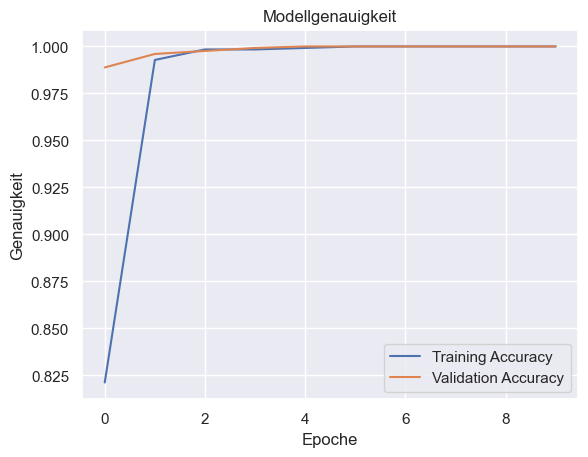

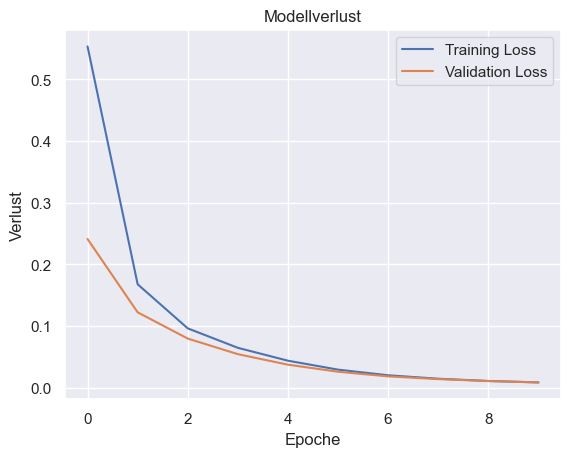

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Modellgenauigkeit')
plt.ylabel('Genauigkeit')
plt.xlabel('Epoche')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Modellverlust')
plt.ylabel('Verlust')
plt.xlabel('Epoche')
plt.legend()
plt.show()


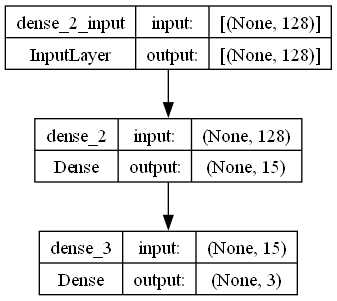

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)